In [1]:
import os
import sys
import re
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
from IPython.display import display, HTML, clear_output
import pandas as pd
from itertools import product
import math

In [2]:
diag = gum.InfluenceDiagram()

Inspect  = diag.addDecisionNode(gum.LabelizedVariable('I','Inspect',["yes","no"])) 
BuyHouse  = diag.addDecisionNode(gum.LabelizedVariable('BH','BuyHouse',["yes","no"])) 

Condition = diag.addChanceNode(gum.LabelizedVariable("C", "Condition", ["good", "bad"]))
Report = diag.addChanceNode(gum.LabelizedVariable("R", "Report", ["good", "bad", "unknown"]))

U=diag.addUtilityNode(gum.LabelizedVariable("U", "U", 1))
V=diag.addUtilityNode(gum.LabelizedVariable("V", "V", 1))

In [3]:
diag.addArc(Inspect, U)
diag.addArc(Inspect, Report)
diag.addArc(Condition, Report)
diag.addArc(Condition, V)
diag.addArc(Inspect, BuyHouse)
diag.addArc(Report, BuyHouse)
diag.addArc(BuyHouse, V)

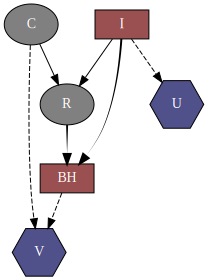

In [4]:
gnb.showInfluenceDiagram(diag)

In [5]:
diag.utility("U")[0] = -600 # 
diag.utility("U")[1] = 0 # 

diag.utility("V")[0,0] = 5000 # 
diag.utility("V")[0,1] = -3000 # 
diag.utility("V")[1,0] = 0 # 
diag.utility("V")[1,1] = 0 # 

In [16]:
diag.cpt(Condition)[0] = .7
diag.cpt(Condition)[1] = .3

diag.cpt(Report)[0,0,0] = .95
diag.cpt(Report)[0,0,1] = 0.05
diag.cpt(Report)[0,0,2] = 0

diag.cpt(Report)[0,1,0] = 0.1
diag.cpt(Report)[0,1,1] = 0.9
diag.cpt(Report)[0,1,2] = 0

diag.cpt(Report)[1,0,0] = 0
diag.cpt(Report)[1,0,1] = 0
diag.cpt(Report)[1,0,2] = 1

diag.cpt(Report)[1,1,0] = 0
diag.cpt(Report)[1,1,1] = 0
diag.cpt(Report)[1,1,2] = 1


In [23]:
gnb.flow.row(diag.cpt(Report), diag.cpt(Condition))

In [22]:
gnb.flow.row(diag.utility(V), diag.utility(U))

In [29]:
evs = {"I":0, "R":1, "BH":0}
ie = gum.ShaferShenoyLIMIDInference(diag) 
ie.addNoForgettingAssumption(["I","BH"])
gnb.sideBySide(gnb.getInference(diag,engine=ie, evs=evs, size=200))